<a href="https://colab.research.google.com/github/raquel1313/Evaluacion2ML/blob/main/Informe_Tecnico_FMY0100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

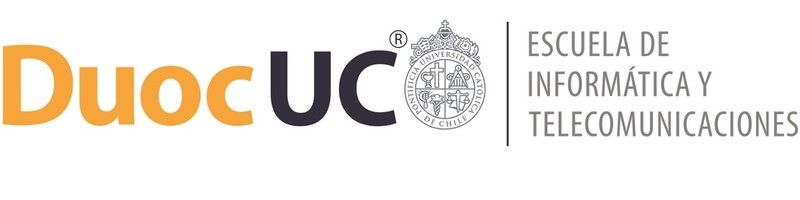

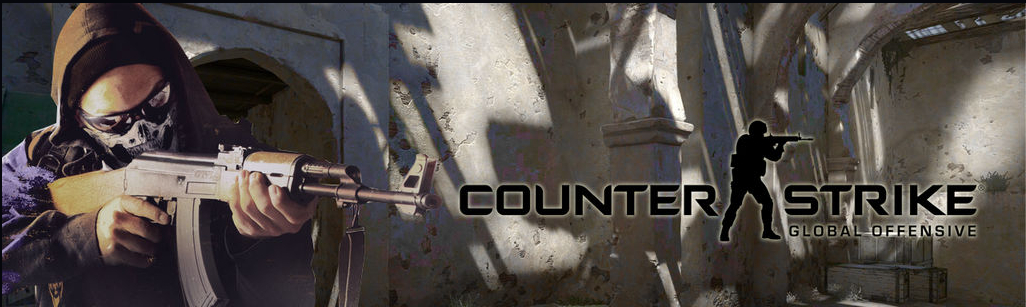

# Informe Técnico - Examen Transversal: Caso Counter Strike


Integrantes:
* Martina Gonzalez
* Raquel Rehbein

Docente:     Giocrisrai Godoy

Sección: MLY0100 -

# Caso Fundamentos de Machine Learning

CONTEXTO CASO

Valve, los ha contactado como equipo de análisis de datos y modelado de Machine Learning para analizar y realizar modelos predictivos sobre los datos.

En cada partida de Counter Strike: GO dos equipos de 5 jugadores (denominados terroristas y contra-terroristas) se enfrentan.


El objetivo del equipo terrorista es plantar una bomba con timer de 45 segundos en uno de dos sitios específicos dentro de un mapa. Por otro lado, el objetivo del equipo contra-terrorista es evitar que la bomba sea plantada o desactivarla antes de que esta explote cuando ya ha sido plantada. Los datos a utilizar corresponden a sobre 7000 partidas del juego (con un máximo de 10 jugadores c/u)  


Los datos han sido extraídos de replays, los cuales son archivos propietarios con la información de cada una de las acciones realizadas por cada jugador dentro de una partida. Los replays han sido extraídos de la red utilizando un scrapper y pre-procesados utilizando un script.  



En este caso, la data corresponde a un archivo CSV con 79.157 filas, cada una correspondiente a un jugador dentro de una partida. El archivo contiene 29 columnas correspondientes a variables que describen las acciones del jugador dentro del juego.


$$
\begin{aligned}
&\begin{array}{cccc}
\hline \hline \text { Dato } & \text { Descripción } \\
\hline Map & \text {Nombre  del Mapa donde se jugó la partida}  \\
\hline \text{ Team} & \text { Nombre de equipo al que pertenece el jugador} \\
\hline \text{ InternalTeamId} & \text { Identificador del equipo al que pertenece el jugador.} \\
\hline \text{ MatchId} & \text { Identificador de la partida.} \\
\hline \text{ RoundId} & \text { Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)} \\
\hline \text{ MatchWinner} & \text { Indica si el jugador ganó o no la partida.} \\
\hline \text{ RoundWinner} & \text { Indica si el jugador ganó o no la ronda analizada.} \\
\hline \text{ Survived} & \text { Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).} \\
\hline \text{ AbnormalMatch} & \text { Indica si la partida del jugador tuvo un error por conexión de red} \\
\hline \text{ TimeAlive} & \text { Indica el tiempo en segundos que el jugador estuvo vivo durante el juego} \\
\hline \text{ TravelledDistance} & \text { Distancia viajada por el jugador durante la partida.} \\
\hline \text{ RLethalGrenadesThrown/RNonLethalGrenadesThrown} & \text { Cantidad de granadas lanzadas, categorizadas en letales y no-letales.} \\
\hline \text{ PrimaryXXXX} & \text { Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.} \\
\hline \text{ [Match|Round] Assists} & \text { Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] Kills} & \text { Cantidad de kills efectuados por el jugador durante la partida o la ronda.} \\
\hline \text{ [Match|Round] FlankKills} & \text { Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.} \\
\hline \text{ [Match|Round] HeadShots} & \text { Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.} \\
\hline \text{ RoundStartingEquipmentValue} & \text { Valor del equipamiento llevado por el jugador al inicio de la ronda.} \\
\hline \text{ TeamStartingEquipmentValue} & \text { Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.} \\
\end{array}
\end{aligned}
$$

## Fase 1: Business Understanding

Hipótesis de clasificación:
"*¿Es posible predecir si un jugador sobrevivirá en una ronda?*"\
Hipótesis de regresión:

*¿Cuántos headshot hará un jugador por ronda?.*

## Fase 2: Data Understanding

##Librerías

In [42]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Configuración para visualizaciones
plt.style.use('ggplot')
sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

##Carga del dataset

In [43]:
from google.colab import files
import pandas as pd # Importing the pandas library

uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=";") # Now pd is defined and can be used


Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022 (1).csv


In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,79157.0,60570.193640,36436.598386,600.0,30830.0,56720.0,90639.0,123779.0
InternalTeamId,79157.0,1.500006,0.500003,1.0,1.0,2.0,2.0,2.0
MatchId,79157.0,250.525033,149.557804,4.0,128.0,236.0,373.0,511.0
RoundId,79157.0,12.765517,7.432837,1.0,6.0,12.0,19.0,36.0
RLethalGrenadesThrown,79157.0,0.498667,0.597985,0.0,0.0,0.0,1.0,4.0
RNonLethalGrenadesThrown,79157.0,1.258057,1.184909,0.0,0.0,1.0,2.0,6.0
PrimaryAssaultRifle,79157.0,0.675363,0.464125,0.0,0.0,1.0,1.0,1.0
PrimarySniperRifle,79157.0,0.089840,0.279797,0.0,0.0,0.0,0.0,1.0
PrimaryHeavy,79157.0,0.005964,0.075497,0.0,0.0,0.0,0.0,1.0
PrimarySMG,79157.0,0.007046,0.082453,0.0,0.0,0.0,0.0,1.0


In [45]:
df.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,51.120.248.995.704.500,10.083.140.737.457.000,0,4,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,4.348.662.552.266.170,60.960.883.184.688.400,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,3.735.469.847.054.540,5.642.252.383.582.750,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,4.767.886.136.441.470,8.963.473.313.229.970,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,5.312.251.089.027.310,10.865.649.734.393.100,1,1,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0


In [46]:
df.tail()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
79152,123775,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,340.272.074.099.723,4.048.177.852.924.460,1,1,1.0,0.0,0.0,0.0,0,2.277.596,0,0,0,0,5600,27100,4,0,2,2
79153,123776,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,2.926.105.436.288.080,3.213.477.612.567.870,0,0,1.0,0.0,0.0,0.0,0,28.714.119,1,0,1,0,5500,27100,8,5,1,3
79154,123777,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,5.914.717.797.783.930,6.005.168.938.274.500,1,1,1.0,0.0,0.0,0.0,0,297.689.228,0,0,0,0,4950,27100,5,0,2,3
79155,123778,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,42.582.842.797.783.900,27.987.628.542.398.100,0,2,0.0,1.0,0.0,0.0,0,7.528.178,0,0,0,0,4950,27100,1,0,1,0
79156,123779,de_mirage,CounterTerrorist,2,511,5,False,False,True,False,8.004.793.109.418.280,9.867.724.708.696.010,2,1,1.0,0.0,0.0,0.0,0,438.720.474,4,0,2,0,6100,27100,5,1,1,2


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

In [48]:
#vemos si hay datos faltantes
df.columns[df.isnull().any()]

Index(['Team', 'MatchWinner'], dtype='object')

In [49]:
# Verifiquemos el porcentaje de valores faltantes en estas columnas.
miss = df.isnull().sum()/len(df)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

,0
MatchWinner,0.000013
Team,0.000025


In [50]:
# Clasificación para dataset de partidas (ejemplo adaptado)

print("\n--- Clasificación de variables ---")

# Variables numéricas continuas (ejemplo)
numericas_continuas = ['TimeAlive', 'TravelledDistance', 'FirstKillTime']

# Variables numéricas discretas
numericas_discretas = ['InternalTeamId', 'MatchId', 'RoundId', 'RoundKills', 'RoundAssists',
                       'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue',
                       'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills',
                       'MatchAssists', 'MatchHeadshots', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown']

# Variables categóricas nominales
categoricas_nominales = ['Map', 'Team']

# Variables booleanas que también pueden tratarse como categóricas
booleanas = ['RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch']

# Convertir variables categóricas y booleanas
for col in categoricas_nominales + booleanas:
    df[col] = df[col].astype('category')

print("Variables numéricas continuas:", numericas_continuas)
print("Variables numéricas discretas:", numericas_discretas)
print("Variables categóricas nominales:", categoricas_nominales)
print("Variables booleanas (como categóricas):", booleanas)



--- Clasificación de variables ---
Variables numéricas continuas: ['TimeAlive', 'TravelledDistance', 'FirstKillTime']
Variables numéricas discretas: ['InternalTeamId', 'MatchId', 'RoundId', 'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown']
Variables categóricas nominales: ['Map', 'Team']
Variables booleanas (como categóricas): ['RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch']


<Axes: xlabel='MatchKills', ylabel='Density'>

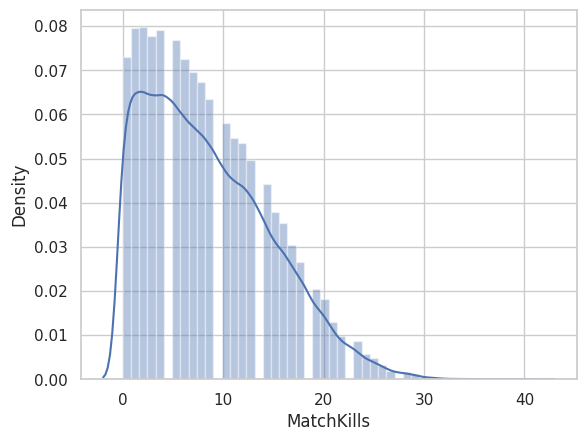

In [51]:
sns.distplot(df['MatchKills'])

Podemos observar que la distribucion de MatchKills se encuentra sesgada hacia la derecha lo que nos indica en este caso que pocos jugadores realizan más de 10 kills

In [52]:
df['Log_MatchKills'] = np.log1p(df['MatchKills'])

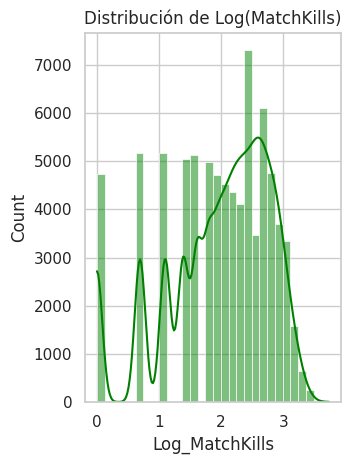

In [53]:
# Gráfico de la distribución después de aplicar log
plt.subplot(1, 2, 2)
sns.histplot(df['Log_MatchKills'], kde=True, color='green', bins=30)
plt.title('Distribución de Log(MatchKills)')

plt.tight_layout()
plt.show()

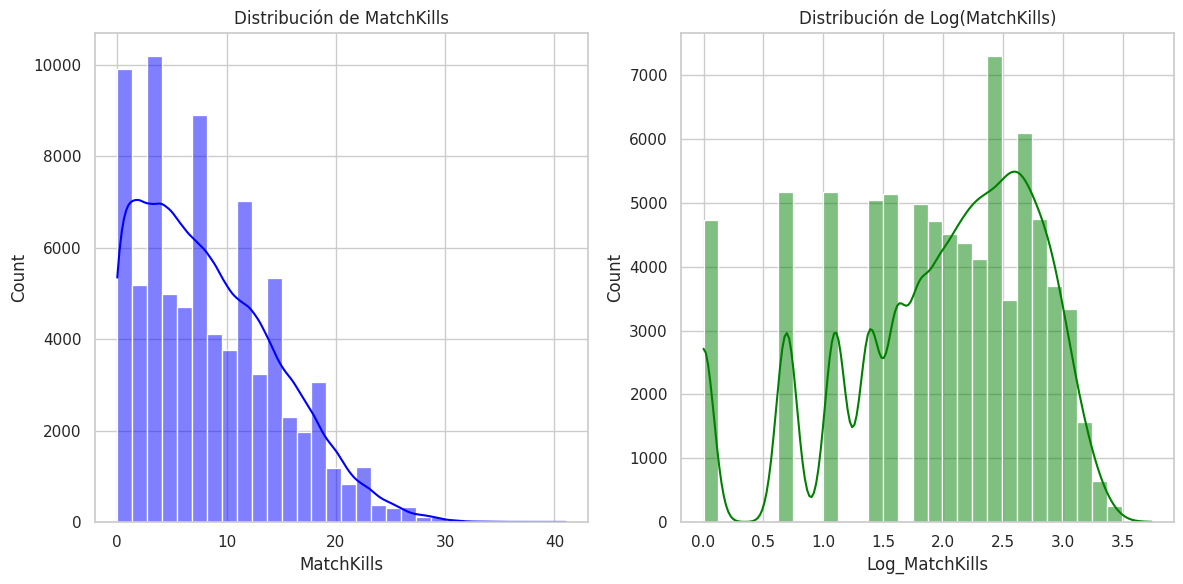

In [54]:
# Gráfico de la distribución original
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['MatchKills'], kde=True, color='blue', bins=30)
plt.title('Distribución de MatchKills')

# Gráfico de la distribución después de aplicar log
plt.subplot(1, 2, 2)
sns.histplot(df['Log_MatchKills'], kde=True, color='green', bins=30)
plt.title('Distribución de Log(MatchKills)')

plt.tight_layout()
plt.show()


In [55]:
numeric_data = df.select_dtypes(include=[np.number])
cat_data = df.select_dtypes(exclude=[np.number])
print ("Hay {} columnas numéricas y {} columnas categóricas en los datos de entrenamiento".format(numeric_data.shape[1],cat_data.shape[1]))

Hay 22 columnas numéricas y 9 columnas categóricas en los datos de entrenamiento


<Axes: >

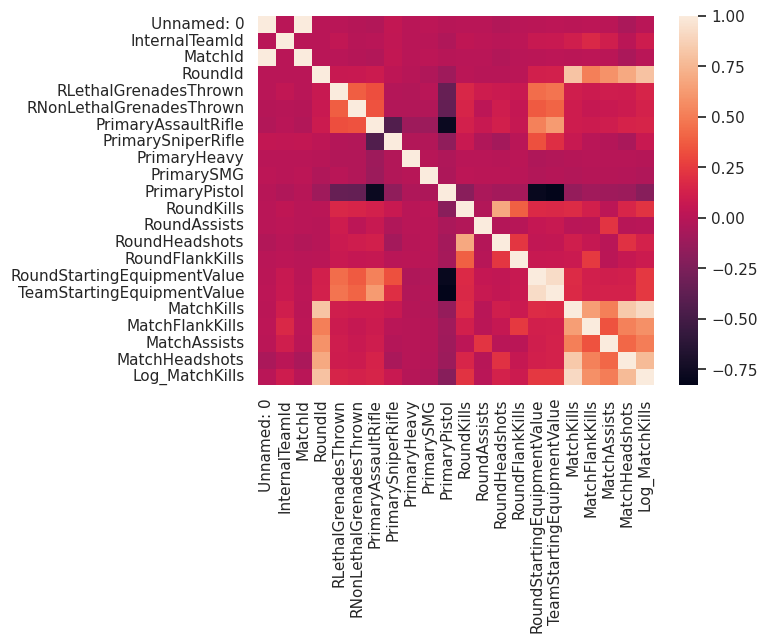

In [56]:
corr = numeric_data.corr()
sns.heatmap(corr)

In [57]:
# Assuming 'numeric_data' is your DataFrame with numerical features

# Calculate correlations with 'MatchKills'
correlation_with_matchkills = numeric_data.corr()['MatchKills'].sort_values(ascending=False)

# Filtrar las 10 variables más correlacionadas con MatchKills
top_10_correlations = correlation_with_matchkills.head(10)
print(top_10_correlations)

MatchKills                     1.000000
Log_MatchKills                 0.913412
MatchHeadshots                 0.831450
RoundId                        0.807501
MatchFlankKills                0.641599
MatchAssists                   0.510016
RoundKills                     0.183402
RoundStartingEquipmentValue    0.179080
TeamStartingEquipmentValue     0.178526
RoundHeadshots                 0.112018
Name: MatchKills, dtype: float64


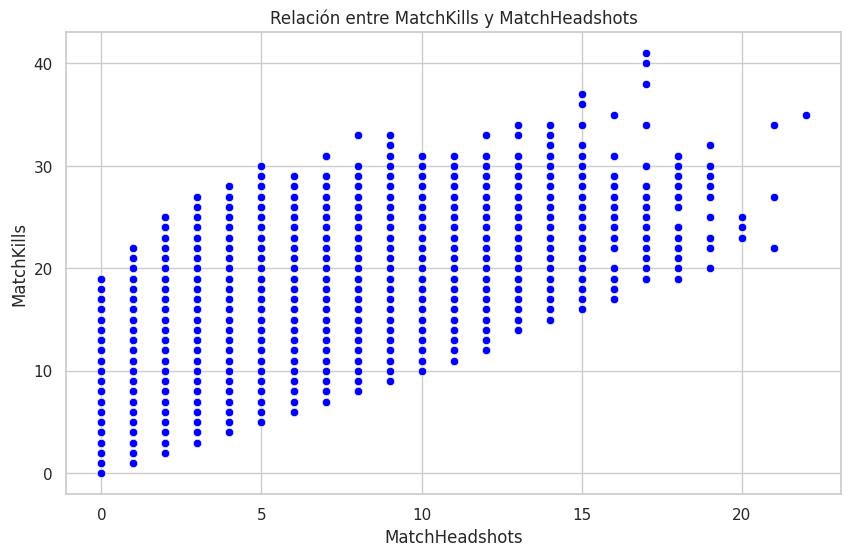

In [58]:
plt.figure(figsize=(10, 6))

# Gráfico de dispersión de MatchKills vs MatchHeadshots
sns.scatterplot(x=df['MatchHeadshots'], y=df['MatchKills'], color='blue')
plt.title('Relación entre MatchKills y MatchHeadshots')
plt.xlabel('MatchHeadshots')
plt.ylabel('MatchKills')
plt.grid(True)

plt.show()

En este grafico de disperción podemos observar que existe una correlacion positiva ademas como no es continua podemos ver los puntos separados de manera ubiforme

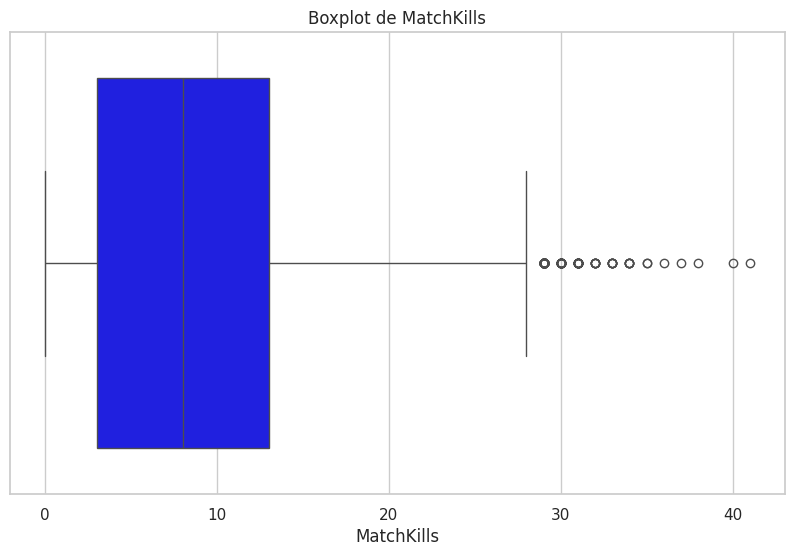

In [59]:
# Boxplot para MatchKills
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['MatchKills'], color='blue')
plt.title('Boxplot de MatchKills')
plt.xlabel('MatchKills')
plt.show()

Podemos observar que existen datos atipicos, estos pueden ser jugadores que realizaron un numero muy alto de kills durante el juego

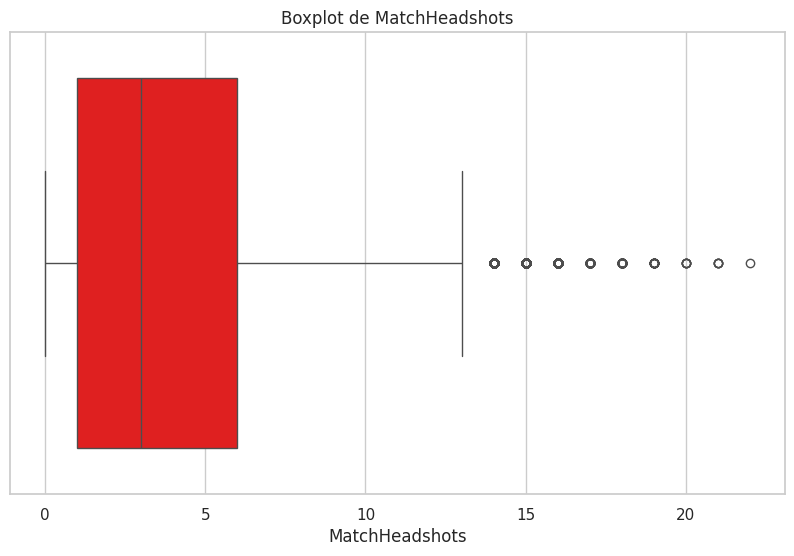

In [60]:
# Boxplot para MatchHeadshots
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['MatchHeadshots'], color='red')
plt.title('Boxplot de MatchHeadshots')
plt.xlabel('MatchHeadshots')
plt.show()

Podemos Observar que existen datos atipicos en este caso jugadores que realizaron muchos heatshots

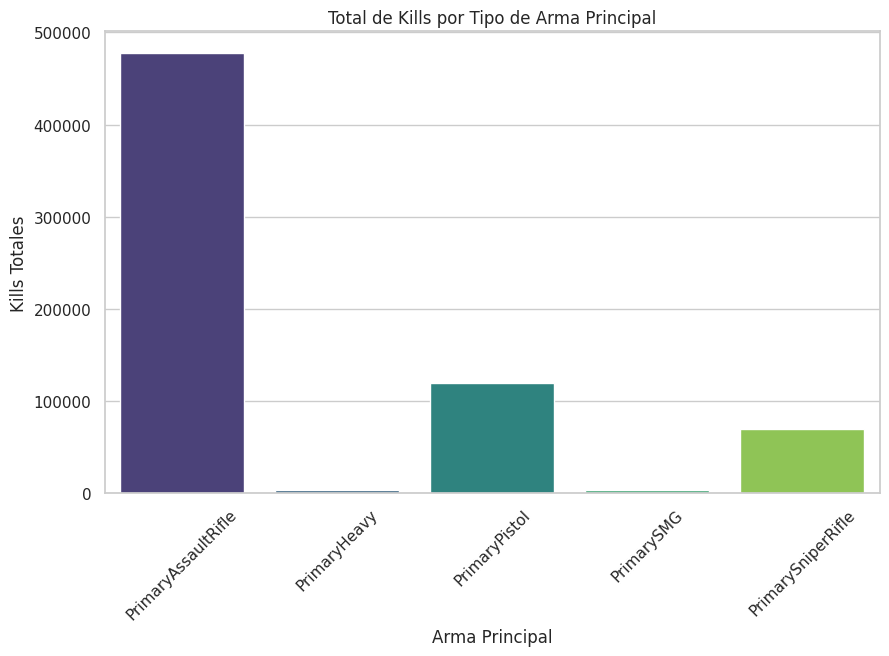

In [61]:
# Crear columna con el arma más usada
df['ArmaPrincipal'] = df[['PrimaryAssaultRifle', 'PrimarySniperRifle', 'PrimarySMG', 'PrimaryHeavy', 'PrimaryPistol']].idxmax(axis=1)

# Ahora sí agrupamos las kills por ArmaPrincipal
kills_by_weapon = df.groupby('ArmaPrincipal')['MatchKills'].sum().reset_index()

# Graficamos
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(data=kills_by_weapon, x='ArmaPrincipal', y='MatchKills', palette='viridis')
plt.title('Total de Kills por Tipo de Arma Principal')
plt.xlabel('Arma Principal')
plt.ylabel('Kills Totales')
plt.xticks(rotation=45)
plt.show()

Podemos observar que el arma mas utilisada para kills es PrimaryAssaultRifle seguida de PrimarySniperRifle , PrimaryHeavy

In [62]:
df.head()


,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,Log_MatchKills,ArmaPrincipal
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,51.120.248.995.704.500,10.083.140.737.457.000,0,4,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,750,4400,0,0,0,0,0.0,PrimaryPistol
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,4.348.662.552.266.170,60.960.883.184.688.400,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,800,4400,0,0,0,0,0.0,PrimaryPistol
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,3.735.469.847.054.540,5.642.252.383.582.750,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,0.0,PrimaryPistol
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,4.767.886.136.441.470,8.963.473.313.229.970,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,850,4400,0,0,0,0,0.0,PrimaryPistol
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,5.312.251.089.027.310,10.865.649.734.393.100,1,1,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,0.0,PrimaryPistol


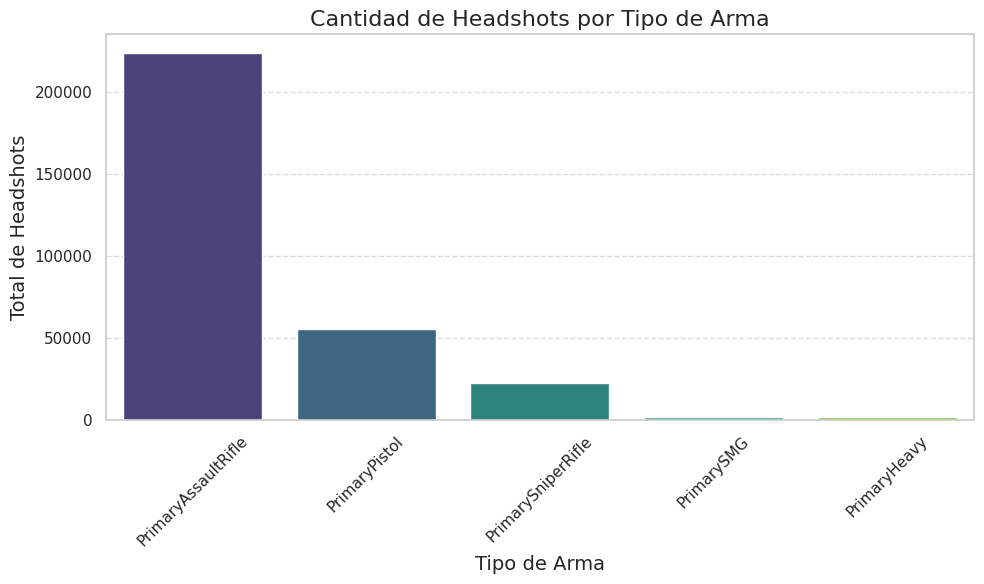

In [63]:
# Agrupar por arma principal y sumar los headshots
headshots_by_weapon = df.groupby('ArmaPrincipal')['MatchHeadshots'].sum().reset_index()

# Ordenar de mayor a menor
headshots_by_weapon = headshots_by_weapon.sort_values(by='MatchHeadshots', ascending=False)

# Crear el gráfico
plt.figure(figsize=(10,6))
sns.barplot(data=headshots_by_weapon, x='ArmaPrincipal', y='MatchHeadshots', palette='viridis')

# Personalizar el gráfico
plt.title('Cantidad de Headshots por Tipo de Arma', fontsize=16)
plt.xlabel('Tipo de Arma', fontsize=14)
plt.ylabel('Total de Headshots', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

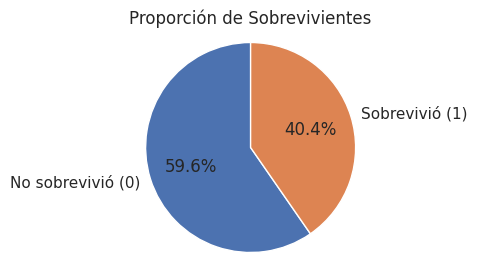

In [64]:
#evaluamos la variable Survived:
counts = df['Survived'].value_counts()

# Crear un gráfico de torta
plt.figure(figsize=(4, 3))
plt.pie(counts, labels=['No sobrevivió (0)', 'Sobrevivió (1)'], autopct='%1.1f%%', startangle=90)
plt.title('Proporción de Sobrevivientes')
plt.axis('equal')  # Hace que el gráfico sea circular
plt.show()

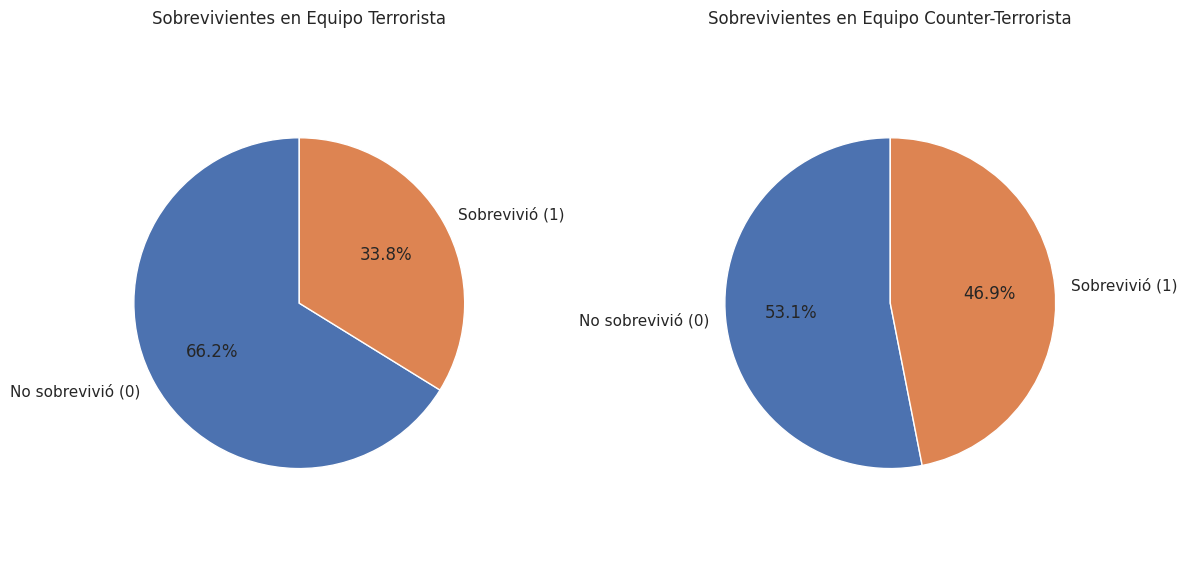

In [67]:
#ahora podemos analizar la supervivencia por team
counts_terrorist = df[df['Terrorist'] == 1]['Survived'].value_counts()
counts_counter = df[df['CounterTerrorist'] == 1]['Survived'].value_counts()

# Crear los gráficos de torta
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico para el equipo Terrorist
axes[0].pie(counts_terrorist, labels=['No sobrevivió (0)', 'Sobrevivió (1)'],
             autopct='%1.1f%%', startangle=90)
axes[0].set_title('Sobrevivientes en Equipo Terrorista')
axes[0].axis('equal')

# Gráfico para el equipo Counter-Terrorist
axes[1].pie(counts_counter, labels=['No sobrevivió (0)', 'Sobrevivió (1)'],
             autopct='%1.1f%%', startangle=90)
axes[1].set_title('Sobrevivientes en Equipo Counter-Terrorista')
axes[1].axis('equal')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

##Porcentualmente si el jugador es Counter terrorista tiene un 13.2% de probabilidad de sobrevivir hasta el final de la partida

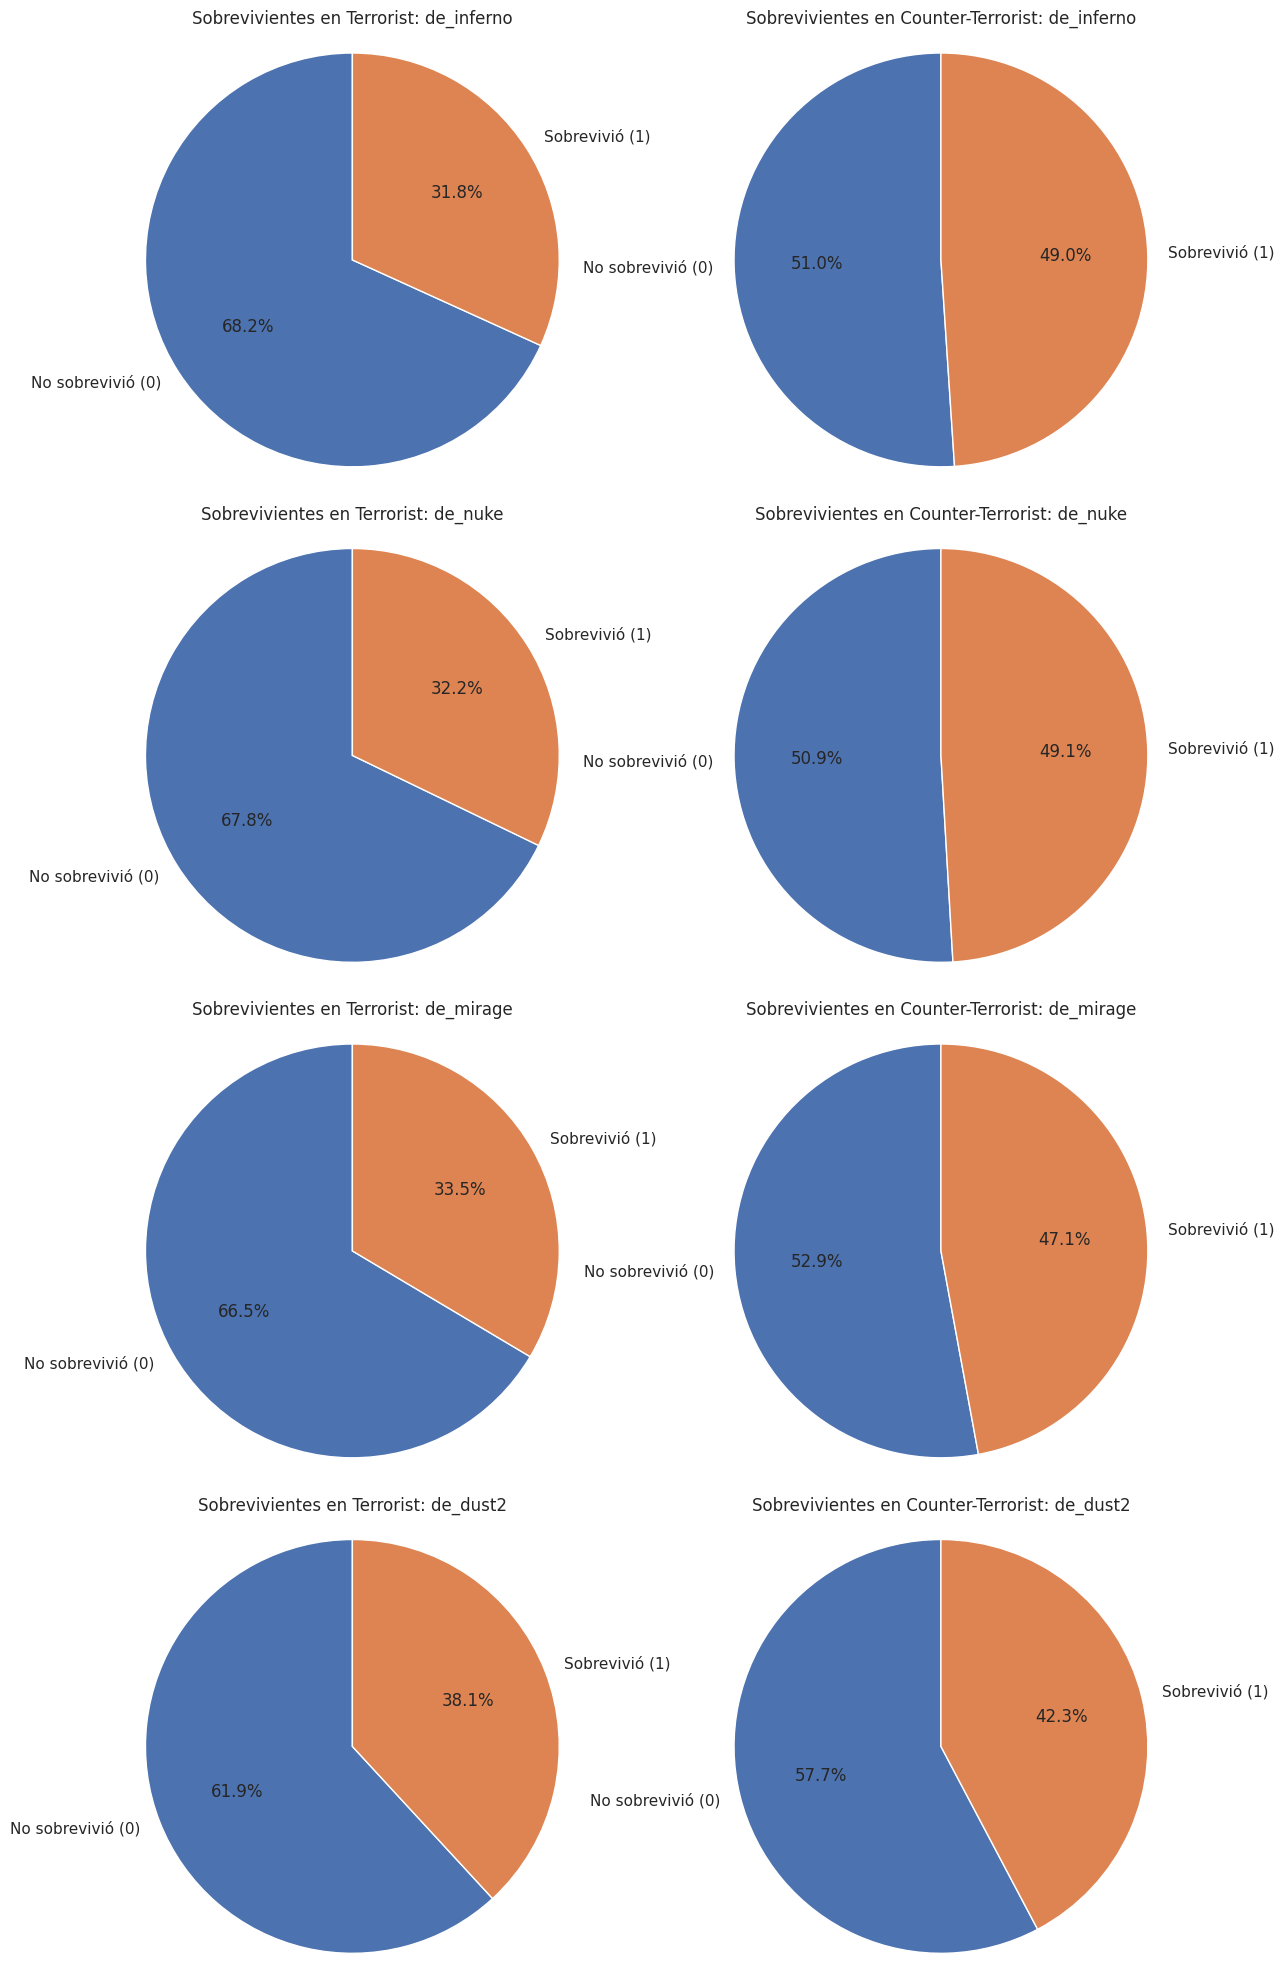

In [68]:
# Obtener mapas únicos
maps = df['Map'].unique()

fig, axes = plt.subplots(len(maps), 2, figsize=(12, 5 * len(maps)))

for i, map_name in enumerate(maps):
    # Contar supervivencia por equipo para cada mapa
    counts_terrorist = df[(df['Team'] == 'Terrorist') & (df['Map'] == map_name)]['Survived'].value_counts()
    counts_counter = df[(df['Team'] == 'CounterTerrorist') & (df['Map'] == map_name)]['Survived'].value_counts()

    # Gráfico para el equipo Terrorist
    axes[i, 0].pie(counts_terrorist, labels=['No sobrevivió (0)', 'Sobrevivió (1)'],
                    autopct='%1.1f%%', startangle=90)
    axes[i, 0].set_title(f'Sobrevivientes en Terrorist: {map_name}')
    axes[i, 0].axis('equal')

    # Gráfico para el equipo Counter-Terrorist
    axes[i, 1].pie(counts_counter, labels=['No sobrevivió (0)', 'Sobrevivió (1)'],
                    autopct='%1.1f%%', startangle=90)
    axes[i, 1].set_title(f'Sobrevivientes en Counter-Terrorist: {map_name}')
    axes[i, 1].axis('equal')

# Ajustar el layout
plt.tight_layout()
plt.show()

##No da información relevante

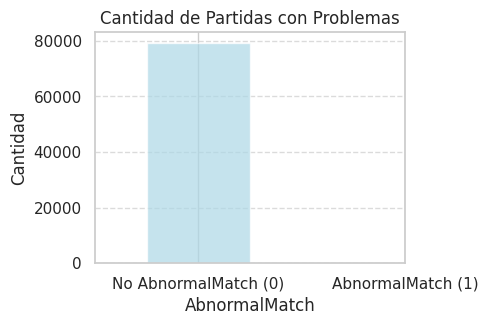

In [69]:
counts = df['AbnormalMatch'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(4, 3))
counts.plot(kind='bar', color=['lightblue', 'salmon'], alpha=0.7)
plt.xticks(ticks=[0, 1], labels=['No AbnormalMatch (0)', 'AbnormalMatch (1)'], rotation=0)
plt.title('Cantidad de Partidas con Problemas')
plt.xlabel('AbnormalMatch')
plt.ylabel('Cantidad')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Solo existe una partida con problemas en el regisstro



## Fase 3: Data Preparation

In [70]:
# Función para identificar outliers con el método IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detectar outliers en MatchKills
matchkills_outliers = detect_outliers(df, 'MatchKills')
print(f"Número de outliers en MatchKills: {len(matchkills_outliers)}")

# Detectar outliers en MatchHeadshots
matchheadshots_outliers = detect_outliers(df, 'MatchHeadshots')
print(f"Número de outliers en MatchHeadshots: {len(matchheadshots_outliers)}")


Número de outliers en MatchKills: 162
Número de outliers en MatchHeadshots: 724


In [71]:
# Eliminación de outliers
# Guardar outliers en un nuevo DataFrame
outliers_combined = pd.concat([matchkills_outliers, matchheadshots_outliers]).drop_duplicates()

# Eliminar outliers del DataFrame original
df_cleaned = df[~df.index.isin(outliers_combined.index)]

# Imprimir resultados
print(f"Número total de outliers combinados: {len(outliers_combined)}")
print("\nDataFrame original (sin outliers):")
df_cleaned.head()

Número total de outliers combinados: 827

DataFrame original (sin outliers):


,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,Log_MatchKills,ArmaPrincipal,CounterTerrorist,Terrorist
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,51.120.248.995.704.500,10.083.140.737.457.000,0,4,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,750,4400,0,0,0,0,0.0,PrimaryPistol,0,1
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,4.348.662.552.266.170,60.960.883.184.688.400,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,800,4400,0,0,0,0,0.0,PrimaryPistol,0,1
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,3.735.469.847.054.540,5.642.252.383.582.750,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,0.0,PrimaryPistol,0,1
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,4.767.886.136.441.470,8.963.473.313.229.970,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,850,4400,0,0,0,0,0.0,PrimaryPistol,0,1
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,5.312.251.089.027.310,10.865.649.734.393.100,1,1,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,0.0,PrimaryPistol,0,1


In [72]:
print("\nDataFrame con outliers:")
outliers_combined.head()


DataFrame con outliers:


,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,Log_MatchKills,ArmaPrincipal,CounterTerrorist,Terrorist
1455,2936,de_dust2,Terrorist,2,13,23,True,True,False,False,5.393.562.678.269.000,5.211.369.212.427.080,0,0,0.006227,0.993773,0.0,0.0,0,50.056.266.799.999.900,1,1,0,0,5950,23200,29,7,2,12,3.401197,PrimarySniperRifle,0,1
1664,3145,de_dust2,Terrorist,2,14,21,True,False,False,False,5.898.733.165.775.430,12.063.223.736.089.600,0,0,0.000000,0.000000,0.0,0.0,1,5.636.011,1,0,1,0,200,1000,29,2,1,5,3.401197,PrimaryPistol,0,1
1674,3155,de_dust2,Terrorist,2,14,22,False,False,True,False,13.229.926.453.462.400,16.696.591.134.901.100,0,2,0.000000,1.000000,0.0,0.0,0,5.636.011,0,0,0,0,5450,23450,29,2,1,5,3.401197,PrimarySniperRifle,0,1
1684,3165,de_dust2,Terrorist,2,14,23,False,False,True,False,4.303.635.650.109.750,57.897.675.537.210.000,0,0,0.000000,1.000000,0.0,0.0,0,206.424.389,1,0,0,0,6750,21600,30,2,1,5,3.433987,PrimarySniperRifle,0,1
1694,3175,de_dust2,Terrorist,2,14,24,False,False,False,False,47.915.478.313.721.900,824.682.441.931.152,1,1,0.013280,0.986720,0.0,0.0,0,206.424.389,0,0,0,0,6850,25750,30,2,1,5,3.433987,PrimarySniperRifle,0,1


In [73]:
#Para tratar la variable team de mejor manera, creamos una columna para cada tipo de Team
df['CounterTerrorist'] = (df['Team'] == 'CounterTerrorist').astype(int)
df['Terrorist'] = (df['Team'] == 'Terrorist').astype(int)

# Mostrar el DataFrame con las nuevas columnas
df.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,Log_MatchKills,ArmaPrincipal,CounterTerrorist,Terrorist
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,51.120.248.995.704.500,10.083.140.737.457.000,0,4,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,750,4400,0,0,0,0,0.0,PrimaryPistol,0,1
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,4.348.662.552.266.170,60.960.883.184.688.400,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,800,4400,0,0,0,0,0.0,PrimaryPistol,0,1
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,3.735.469.847.054.540,5.642.252.383.582.750,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,0.0,PrimaryPistol,0,1
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,4.767.886.136.441.470,8.963.473.313.229.970,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,850,4400,0,0,0,0,0.0,PrimaryPistol,0,1
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,5.312.251.089.027.310,10.865.649.734.393.100,1,1,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,0.0,PrimaryPistol,0,1


In [74]:
#Creamos una copia
df2= df.copy()

In [75]:
df2.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,Log_MatchKills,ArmaPrincipal,CounterTerrorist,Terrorist
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,51.120.248.995.704.500,10.083.140.737.457.000,0,4,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,750,4400,0,0,0,0,0.0,PrimaryPistol,0,1
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,4.348.662.552.266.170,60.960.883.184.688.400,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,800,4400,0,0,0,0,0.0,PrimaryPistol,0,1
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,3.735.469.847.054.540,5.642.252.383.582.750,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,0.0,PrimaryPistol,0,1
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,4.767.886.136.441.470,8.963.473.313.229.970,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,850,4400,0,0,0,0,0.0,PrimaryPistol,0,1
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,5.312.251.089.027.310,10.865.649.734.393.100,1,1,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,0.0,PrimaryPistol,0,1


In [76]:
#Traemos las armas
df2.ArmaPrincipal.unique()

array(['PrimaryPistol', 'PrimaryAssaultRifle', 'PrimarySMG',
       'PrimarySniperRifle', 'PrimaryHeavy'], dtype=object)

In [77]:
#Remplazamos los datos de modelo String por numericos
df2.ArmaPrincipal.replace({"PrimaryPistol":1, "PrimaryAssaultRifle":2, "PrimarySMG":3, "PrimarySniperRifle":4, "PrimaryHeavy":5}, inplace=True)
df2.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,Log_MatchKills,ArmaPrincipal,CounterTerrorist,Terrorist
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,51.120.248.995.704.500,10.083.140.737.457.000,0,4,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,750,4400,0,0,0,0,0.0,1,0,1
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,4.348.662.552.266.170,60.960.883.184.688.400,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,800,4400,0,0,0,0,0.0,1,0,1
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,3.735.469.847.054.540,5.642.252.383.582.750,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,0.0,1,0,1
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,4.767.886.136.441.470,8.963.473.313.229.970,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,850,4400,0,0,0,0,0.0,1,0,1
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,5.312.251.089.027.310,10.865.649.734.393.100,1,1,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,0.0,1,0,1


In [78]:
#Traemos los mapas
df2.Map.unique()

['de_inferno', 'de_nuke', 'de_mirage', 'de_dust2']
Categories (4, object): ['de_dust2', 'de_inferno', 'de_mirage', 'de_nuke']

In [79]:
#Remplazamos por datos numericos
df2.Map.replace({"de_inferno":1, "de_nuke":2, "de_mirage":3, "de_dust2":4}, inplace=True)
df2.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,Log_MatchKills,ArmaPrincipal,CounterTerrorist,Terrorist
0,600,1,Terrorist,1,4,1,False,True,False,False,51.120.248.995.704.500,10.083.140.737.457.000,0,4,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,750,4400,0,0,0,0,0.0,1,0,1
1,601,1,Terrorist,1,4,1,False,True,False,False,4.348.662.552.266.170,60.960.883.184.688.400,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,800,4400,0,0,0,0,0.0,1,0,1
2,602,1,Terrorist,1,4,1,False,True,False,False,3.735.469.847.054.540,5.642.252.383.582.750,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,0.0,1,0,1
3,603,1,Terrorist,1,4,1,False,True,False,False,4.767.886.136.441.470,8.963.473.313.229.970,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,850,4400,0,0,0,0,0.0,1,0,1
4,604,1,Terrorist,1,4,1,False,True,True,False,5.312.251.089.027.310,10.865.649.734.393.100,1,1,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,0.0,1,0,1


In [80]:
#Borramos columna Team
df2 = df2.drop('Team', axis=1)


In [81]:
# Primero, convertir la columna a string
df2['MatchWinner'] = df2['MatchWinner'].astype(str)

In [82]:
# Reemplazar 'True' por 1, 'False' por 0, y 'nan' por 0
df2['MatchWinner'] = df2['MatchWinner'].replace({'True': 1, 'False': 0, 'nan': 0})

In [83]:
# Finalmente convertir a int
df2['MatchWinner'] = df2['MatchWinner'].astype(int)

In [84]:
#Traemos RounWinner
print(df2['RoundWinner'].unique())

['False', 'True', 'False4', True, False]
Categories (5, object): [False, True, 'False', 'False4', 'True']


In [85]:
# Primero asegurarte de que todo sea string
df2['RoundWinner'] = df2['RoundWinner'].astype(str)

# Luego asignar 1 si contiene 'True', 0 si contiene 'False'
df2['RoundWinner'] = df2['RoundWinner'].apply(lambda x: 1 if 'True' in x else 0)


In [86]:
#Cambiamos datos true y false por nuemricos
df2['Survived'] = df2['Survived'].astype(int)


In [87]:
#Cambiamos datos true y false por nuemricos
df2['AbnormalMatch'] = df2['AbnormalMatch'].astype(int)


In [88]:
df2.head()

,Unnamed: 0,Map,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,TimeAlive,TravelledDistance,RLethalGrenadesThrown,RNonLethalGrenadesThrown,PrimaryAssaultRifle,PrimarySniperRifle,PrimaryHeavy,PrimarySMG,PrimaryPistol,FirstKillTime,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots,Log_MatchKills,ArmaPrincipal,CounterTerrorist,Terrorist
0,600,1,1,4,1,0,1,0,0,51.120.248.995.704.500,10.083.140.737.457.000,0,4,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,750,4400,0,0,0,0,0.0,1,0,1
1,601,1,1,4,1,0,1,0,0,4.348.662.552.266.170,60.960.883.184.688.400,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,800,4400,0,0,0,0,0.0,1,0,1
2,602,1,1,4,1,0,1,0,0,3.735.469.847.054.540,5.642.252.383.582.750,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,0.0,1,0,1
3,603,1,1,4,1,0,1,0,0,4.767.886.136.441.470,8.963.473.313.229.970,0,0,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,850,4400,0,0,0,0,0.0,1,0,1
4,604,1,1,4,1,0,1,1,0,5.312.251.089.027.310,10.865.649.734.393.100,1,1,0.0,0.0,0.0,0.0,1,0.0,0,0,0,0,1000,4400,0,0,0,0,0.0,1,0,1
